In [1]:
#Packages
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#Data Tables
df = pd.read_csv('Monthly_Macroeconomic_Factors.csv')

# set the date as the index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

display(df)
display(df.describe())

,House_Price_Index,Stock_Price_Index,Consumer_Price_Index,Population,Unemployment_Rate,Real_GDP,Mortgage_Rate,Real_Disposable_Income
Date,,,,,,,,
1987-01-01,63.735,14.97068,46.91647,153968000.0,6.6,2.41735,9.2040,6159.5
1987-02-01,64.134,15.86818,47.08523,154123000.0,6.6,4.57724,9.0825,6192.1
1987-03-01,64.470,16.48206,47.29619,154229000.0,6.6,3.87276,9.0350,6200.0
1987-04-01,64.974,16.22884,47.54933,154362000.0,6.3,4.83973,9.8325,5967.2
1987-05-01,65.549,16.14232,47.71810,154490000.0,6.3,4.51565,10.5960,6209.1
...,...,...,...,...,...,...,...,...
2021-11-01,276.092,159.94283,117.26923,205122000.0,4.2,6.97022,3.0675,15470.8
2021-12-01,278.681,157.33822,117.62954,205119000.0,3.9,-1.19019,3.0980,15442.7
2022-01-01,282.060,158.10031,118.61934,207397000.0,4.0,-6.00027,3.4450,15163.5


,House_Price_Index,Stock_Price_Index,Consumer_Price_Index,Population,Unemployment_Rate,Real_GDP,Mortgage_Rate,Real_Disposable_Income
count,423.000000,423.000000,423.000000,4.230000e+02,423.000000,423.000000,423.000000,423.000000
mean,135.083369,65.385903,80.948000,1.851876e+08,5.860284,2.450521,6.323203,10527.899291
std,52.534574,36.084675,19.082168,1.771568e+07,1.651219,6.164322,2.209302,2825.070432
min,63.735000,13.357500,46.916470,1.539680e+08,3.500000,-71.284950,2.684000,5967.200000
25%,81.573000,31.162615,64.784385,1.676905e+08,4.700000,1.118375,4.260000,7801.600000
50%,138.765000,63.198750,80.036450,1.890230e+08,5.500000,2.810690,6.252500,10670.300000
75%,175.055000,91.289865,98.303920,2.022080e+08,6.600000,4.211295,7.912000,12453.000000
max,294.717000,159.942830,121.301000,2.073970e+08,14.700000,48.355870,11.260000,19119.500000


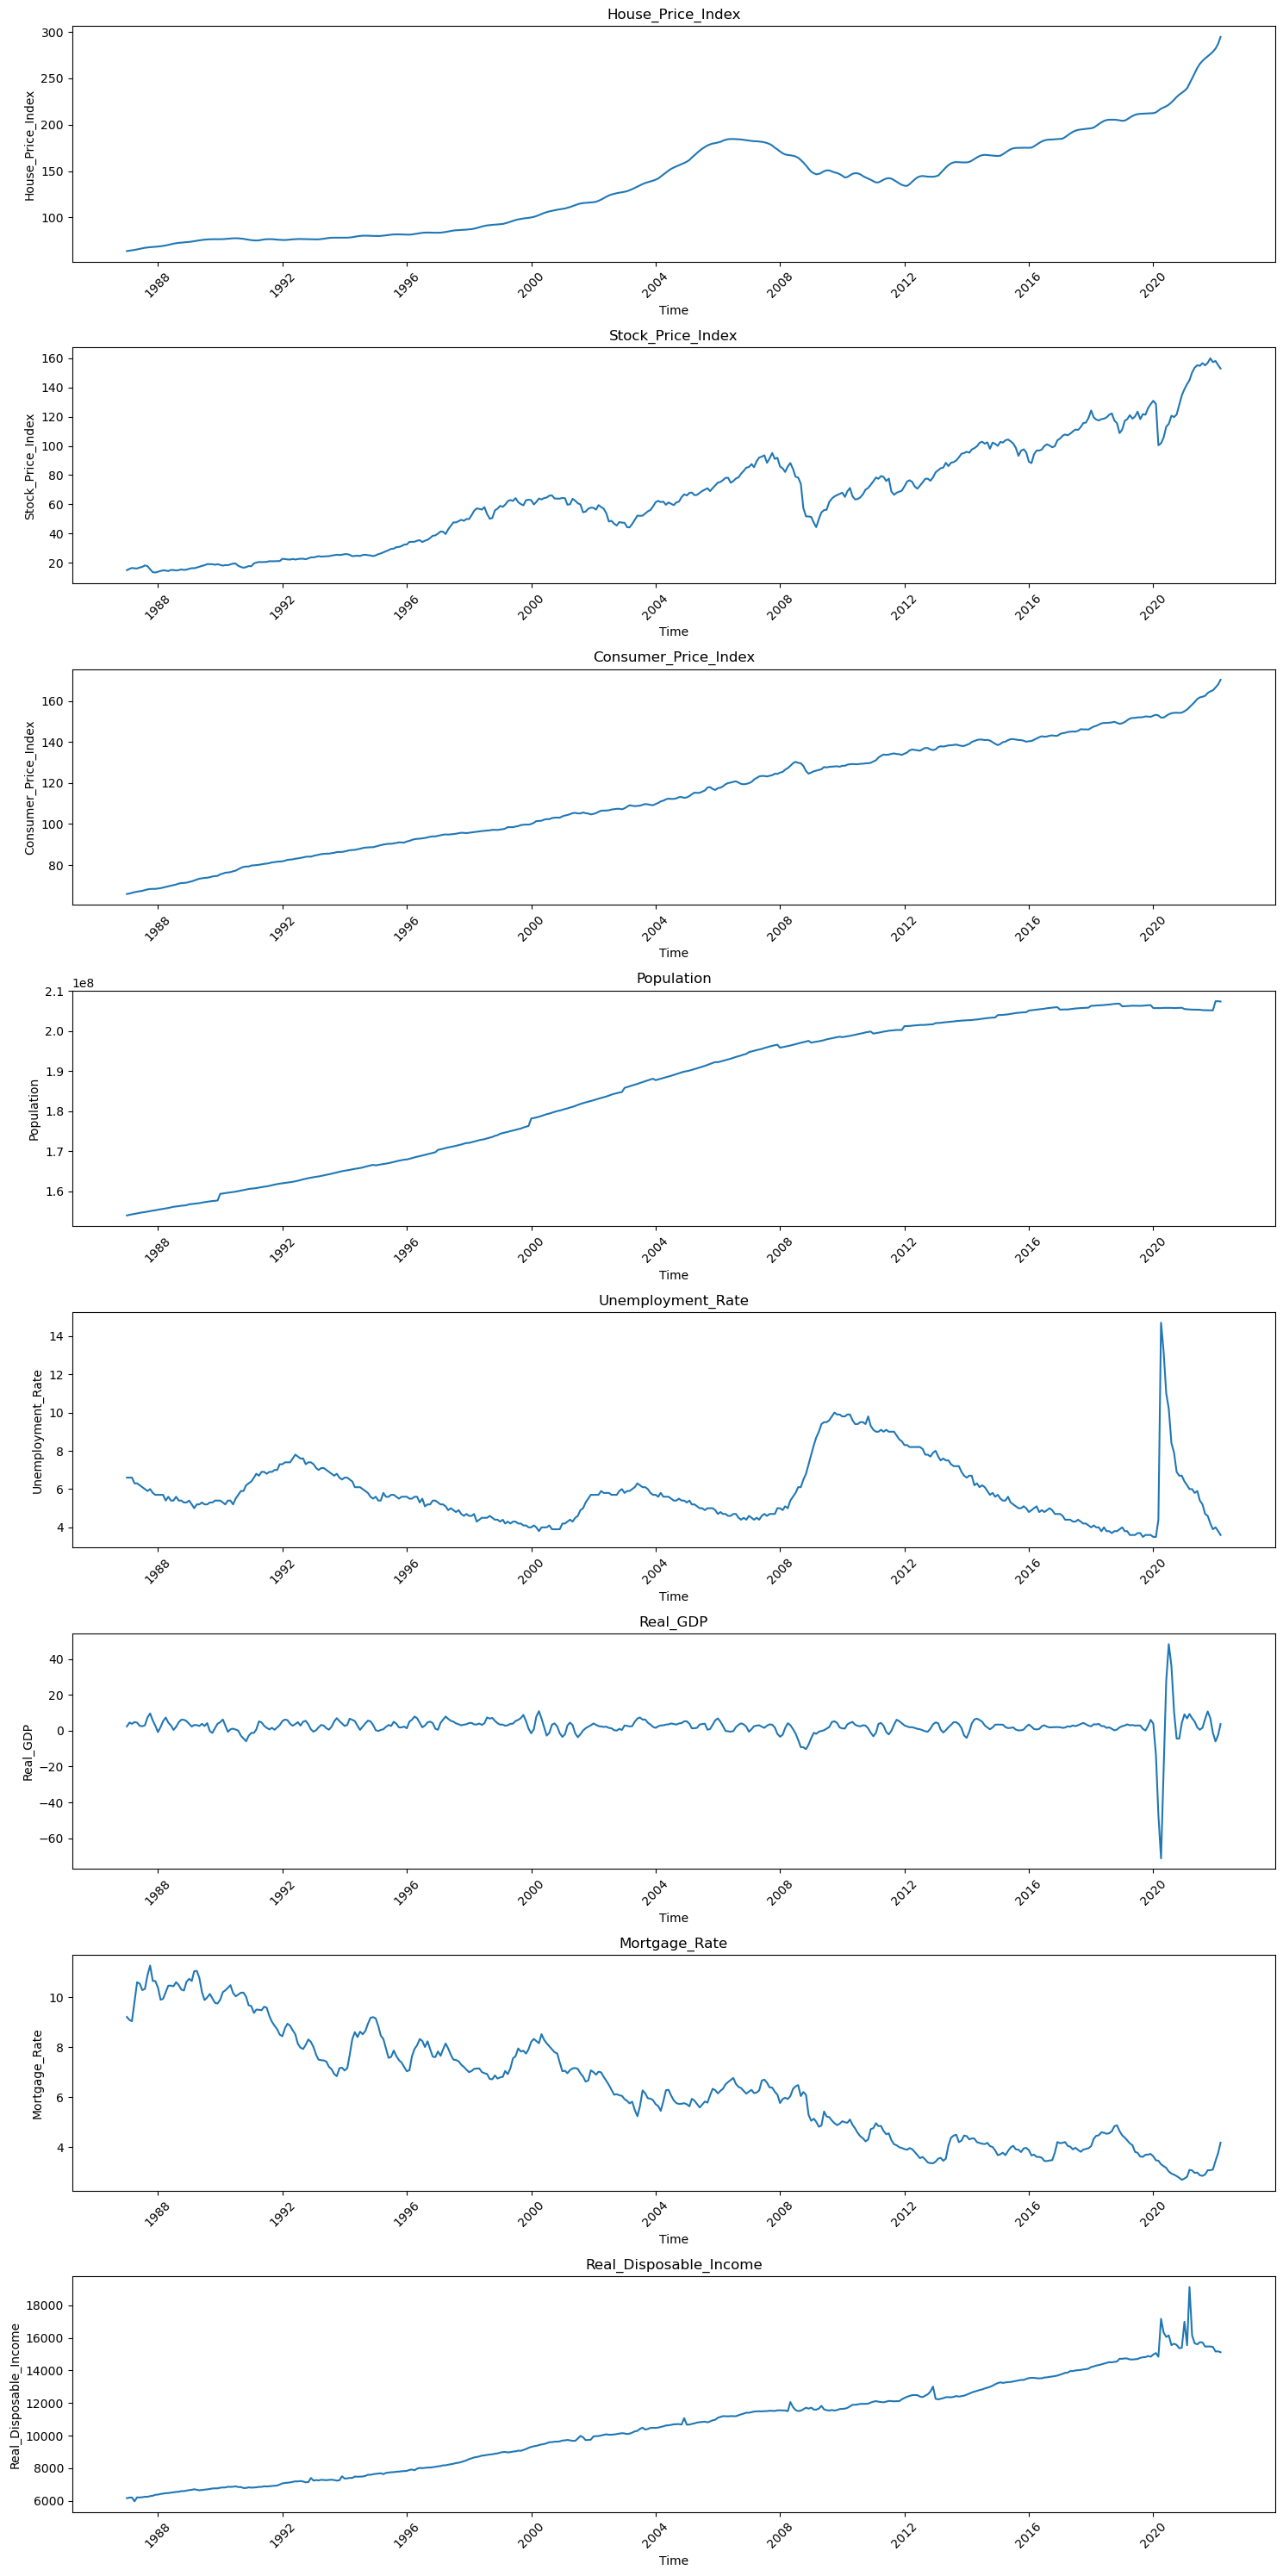

In [3]:
#Data Work Before Visualizations

#standardize CPI to the same year as HPI (January 1, 2000)
df['Consumer_Price_Index'] /= df.loc['2000-01-01', 'Consumer_Price_Index']
df['Consumer_Price_Index'] *= 100

#plots of every variable verus time
variables = df.columns
plt.figure(figsize=(15, 30))  
for i, var in enumerate(variables, start=1):
    plt.subplot(len(variables), 1, i)
    plt.plot(df.index, df[var])
    plt.title(var)
    plt.xlabel('Time')
    plt.ylabel(var)
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()

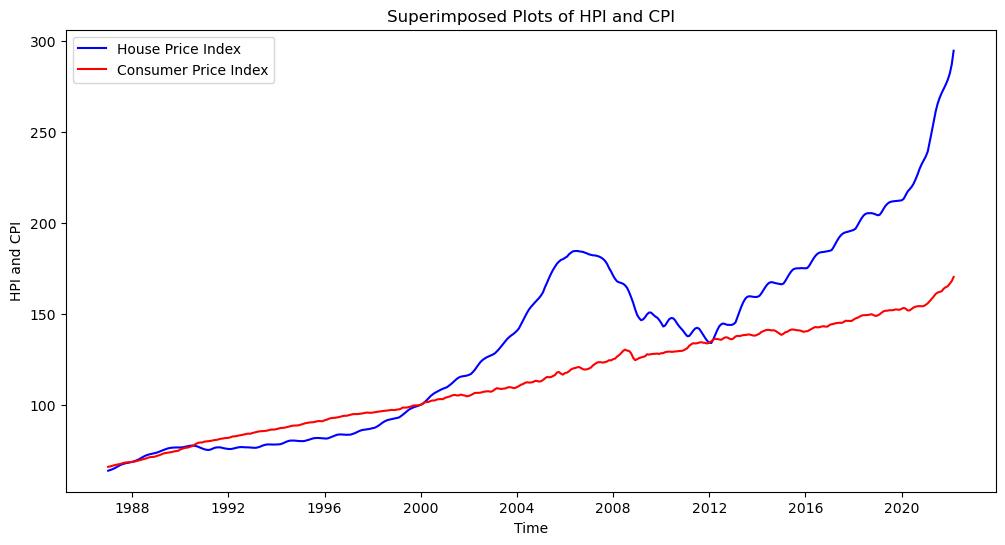

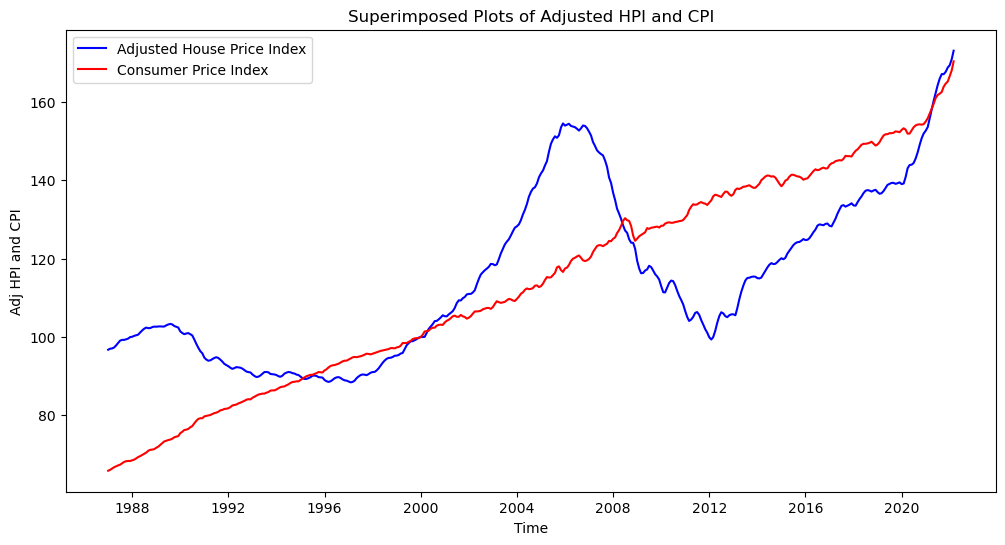

In [4]:
#Comparative Graphs

#Plot originial HPI (including inflation bias) against CPI
plt.figure(figsize=(12, 6))

# Plot the first dataset
plt.plot(df.index, df['House_Price_Index'], label='House Price Index', color='blue')

# Plot the second dataset on the same axes
plt.plot(df.index, df['Consumer_Price_Index'], label='Consumer Price Index', color='red')

# Add titles and labels
plt.title('Superimposed Plots of HPI and CPI')
plt.xlabel('Time')
plt.ylabel('HPI and CPI')

# Add a legend
plt.legend()

#divide HPI by CPI to see HPI without inflation bias
df['Adj_House_Price_Index'] = df['House_Price_Index']/ df['Consumer_Price_Index']
df['Adj_House_Price_Index'] *= 100

#Plot Adj_HPI versus time and CPI versus time to see if Adj_HPI is growing faster than CPI/inflation

plt.figure(figsize=(12, 6))

# Plot the first dataset
plt.plot(df.index, df['Adj_House_Price_Index'], label='Adjusted House Price Index', color='blue')

# Plot the second dataset on the same axes
plt.plot(df.index, df['Consumer_Price_Index'], label='Consumer Price Index', color='red')

# Add titles and labels
plt.title('Superimposed Plots of Adjusted HPI and CPI')
plt.xlabel('Time')
plt.ylabel('Adj HPI and CPI')

# Add a legend
plt.legend()

plt.show()

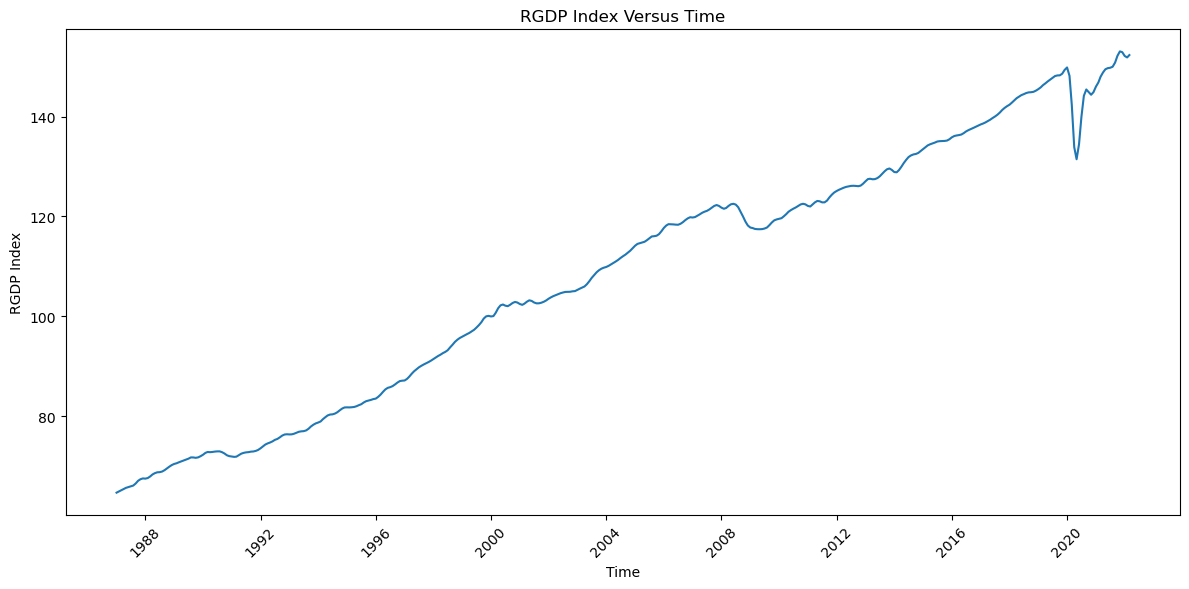

In [5]:
#Computations of Actual Real GDP & its Visualization

# changing real gdp from percentage change to actual real gdp, but it will be relative
# to a base year since we do not have the data of actual dollar amount of rgdp
# we will use January 1, 2000 as the base year as before

# pretending rgdp at index -1 is "1" just for simplicity. now calculate real gdp at each date using the percent
# change for that date from the date before. we need to divide each rgdp data point by 12 to change from annual to 
# monthly form


df['Actual_RGDP'] = df['Real_GDP'] / 12

# convert to percents
df['Actual_RGDP'] /= 100

#add 1 to first date to pretend rgdp in index -1 is 1
df.loc['1987-01-01', 'Actual_RGDP'] += 1


#change each Actual_RGDP element to prior element multiplied by (1+current element)

for i in range(1, len(df)):
    df.iloc[i, df.columns.get_loc('Actual_RGDP')] = df.iloc[i-1, df.columns.get_loc('Actual_RGDP')] * (1 + df.iloc[i, df.columns.get_loc('Actual_RGDP')])

#standardize Actual_RGDP to the same year as HPI (January 1, 2000)
df['Actual_RGDP'] /= df.loc['2000-01-01', 'Actual_RGDP']
df['Actual_RGDP'] *= 100

#Plot Actual_RGDP versus time
plt.figure(figsize=(12, 6))  
plt.plot(df.index, df['Actual_RGDP'])
plt.title('RGDP Index Versus Time')
plt.xlabel('Time')
plt.ylabel('RGDP Index')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

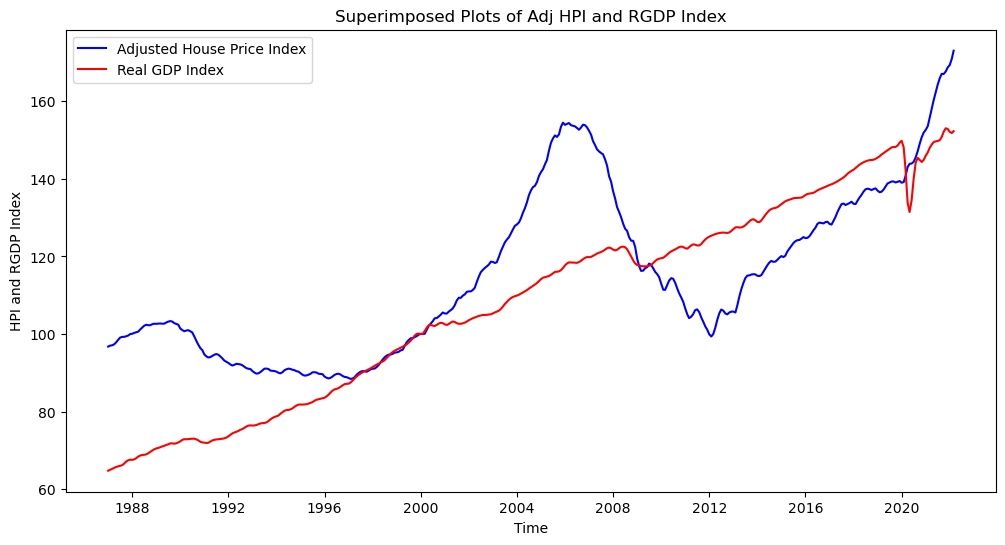

In [6]:
#Graph of actual real GDP vs Adjusted HPI over time

#Superimpose RGDP index versus time over Adjusted HPI versus time. (Both have same base date for comparing purposes)
plt.figure(figsize=(12, 6))

# Plot the first dataset
plt.plot(df.index, df['Adj_House_Price_Index'], label='Adjusted House Price Index', color='blue')

# Plot the second dataset on the same axes
plt.plot(df.index, df['Actual_RGDP'], label='Real GDP Index', color='red')

# Add titles and labels
plt.title('Superimposed Plots of Adj HPI and RGDP Index')
plt.xlabel('Time')
plt.ylabel('HPI and RGDP Index')

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [7]:
#Cross Validation & Feature Selection

# Add a constant to the df for the VIF calculation
X_vif = df.drop(columns=['House_Price_Index']).assign(const=1)

# Calculate and print VIF
vif = pd.DataFrame()
vif["variables"] = X_vif.columns
vif["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

print(vif)

                variables          VIF
0       Stock_Price_Index    38.606199
1    Consumer_Price_Index   155.779540
2              Population   180.401743
3       Unemployment_Rate     6.111905
4                Real_GDP     1.121346
5           Mortgage_Rate    15.088578
6  Real_Disposable_Income    84.725107
7   Adj_House_Price_Index     3.861900
8             Actual_RGDP   667.474017
9                   const  6046.340527


In [8]:
#Optimal Alpha & Lasso Model

# Define dependent and independent Variables
X = df[['Unemployment_Rate', 'Real_GDP', 'Mortgage_Rate']]
y = df['House_Price_Index']

# Create a LassoCV object
lasso_cv = LassoCV(cv=5)

# Fit it to the data
lasso_cv.fit(X, y)

# The optimal alpha level is stored in `lasso_cv.alpha_`
print('Optimal alpha level:', lasso_cv.alpha_)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the Lasso regression model
lasso = Lasso(alpha=lasso_cv.alpha_)
lasso.fit(X_train, y_train)

# Create a DataFrame with the coefficients and column names
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lasso.coef_
})

print(coef_df)

Optimal alpha level: 0.2787133411873053
             Feature  Coefficient
0  Unemployment_Rate    -7.405395
1           Real_GDP    -0.614868
2      Mortgage_Rate   -20.339043


In [9]:
# Accuarcy Metrics
feature_columns = df[['Unemployment_Rate', 'Real_GDP', 'Mortgage_Rate']]# List of feature column names, without House_Price_Index
target_column = df['House_Price_Index']  # Name of the target column

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(feature_columns, target_column, test_size=0.2, random_state=42)

# Create and train a linear regression model
model = Lasso(alpha=lasso_cv.alpha_)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Squared Error: 750.9994378923685
Root Mean Squared Error: 27.404368956288128
R-squared: 0.785144412741358
